In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import riskfolio as rp
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from datetime import datetime
from asset_categories import get_assets

In [7]:
assets = get_assets(['crypto_mid', 'stock_xl', 'commodity_mid'])
print(assets)

end_date = datetime.today().strftime('%Y-%m-%d')

data = yf.download(list(assets.keys()), start='2021-01-01', end=end_date, period='1d')['Adj Close']
data.rename(columns=assets, inplace=True)

returns = data[assets.values()].pct_change().dropna()
returns

[*                      2%%                      ]  2 of 131 completed

{'AAPL': 'Apple Inc.', 'MSFT': 'Microsoft Corporation', 'AMZN': 'Amazon.com Inc.', 'GOOGL': 'Alphabet Inc. (Google)', 'TSLA': 'Tesla Inc.', 'NVDA': 'NVIDIA Corporation', 'JPM': 'JPMorgan Chase & Co.', 'V': 'Visa Inc.', 'PG': 'Procter & Gamble Co.', 'JNJ': 'Johnson & Johnson', 'UNH': 'UnitedHealth Group Incorporated', 'MA': 'Mastercard Incorporated', 'PYPL': 'PayPal Holdings Inc.', 'DIS': 'The Walt Disney Company', 'NFLX': 'Netflix Inc.', 'HD': 'The Home Depot Inc.', 'INTC': 'Intel Corporation', 'CRM': 'Salesforce.com Inc.', 'KO': 'The Coca-Cola Company', 'PEP': 'PepsiCo Inc.', 'CMCSA': 'Comcast Corporation', 'BAC': 'Bank of America Corporation', 'CSCO': 'Cisco Systems Inc.', 'PFE': 'Pfizer Inc.', 'T': 'AT&T Inc.', 'VZ': 'Verizon Communications Inc.', 'WMT': 'Walmart Inc.', 'MRK': 'Merck & Co. Inc.', 'NKE': 'NIKE Inc.', 'ADBE': 'Adobe Inc.', 'XOM': 'Exxon Mobil Corporation', 'CVX': 'Chevron Corporation', 'BA': 'The Boeing Company', 'IBM': 'International Business Machines Corporation', '

[*********************100%%**********************]  131 of 131 completed
/tmp/ipykernel_20130/3746548619.py:9: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = data[assets.values()].pct_change().dropna()


Ticker,Apple Inc.,Microsoft Corporation,Amazon.com Inc.,Alphabet Inc. (Google),Tesla Inc.,NVIDIA Corporation,JPMorgan Chase & Co.,Visa Inc.,Procter & Gamble Co.,Johnson & Johnson,...,Live Cattle,Lean Hogs,Platinum,Palladium,RBOB Gasoline,Heating Oil,Random Length Lumber,Ethanol,Cocoa,Feeder Cattle
Date,,,,,,,,,,,,,,,,,,,,,
2021-09-08,-0.010084,0.000100,0.004619,-0.004086,0.001262,-0.014253,-0.004460,0.012463,0.007595,-0.002437,...,-0.005253,-0.008229,-0.020193,-0.049209,0.000986,0.006976,-0.039575,0.033462,-0.009444,-0.001440
2021-09-09,-0.006705,-0.009860,-0.011726,-0.001044,0.001313,-0.007252,0.004353,-0.006984,-0.004219,-0.022280,...,0.005280,-0.021745,-0.001538,-0.042809,-0.015196,-0.010625,0.006231,-0.018735,-0.005134,-0.001922
2021-09-10,-0.033102,-0.005181,-0.004308,-0.018566,-0.024627,0.013573,-0.011496,-0.011341,0.000972,-0.006545,...,-0.002626,-0.035390,-0.017560,-0.007851,0.025861,0.015281,0.015182,-0.045461,-0.025802,-0.009631
2021-09-11,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2021-09-12,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-22,0.002927,-0.009560,-0.028287,-0.017623,0.017422,-0.031196,0.021315,-0.026287,0.006675,-0.013162,...,0.006740,0.012203,-0.019911,-0.059224,0.021836,0.013953,-0.036538,-0.050939,0.002006,0.004816
2021-11-23,0.002422,-0.006327,0.002091,-0.003554,-0.041353,-0.006572,0.023913,0.014879,0.011096,0.006199,...,0.007253,-0.006698,-0.050197,-0.051502,0.034068,0.025329,0.008802,0.079188,-0.008006,0.016543
2021-11-24,0.003283,0.000681,0.000103,0.002318,0.006285,0.029232,-0.007844,0.023981,-0.005219,-0.002800,...,0.018464,0.017195,0.011629,-0.001299,-0.007488,-0.000545,0.015525,-0.026035,-0.008878,0.015513


You must convert self.cov to a positive definite matrix
You must convert self.cov to a positive definite matrix


,Apple Inc.,Microsoft Corporation,Amazon.com Inc.,Alphabet Inc. (Google),Tesla Inc.,NVIDIA Corporation,JPMorgan Chase & Co.,Visa Inc.,Procter & Gamble Co.,Johnson & Johnson,...,Live Cattle,Lean Hogs,Platinum,Palladium,RBOB Gasoline,Heating Oil,Random Length Lumber,Ethanol,Cocoa,Feeder Cattle
weights,2.910093e-11,2.903780e-11,2.901626e-11,2.914272e-11,2.789098e-11,2.773381e-11,2.903193e-11,2.898854e-11,2.908684e-11,2.906283e-11,...,2.903408e-11,2.903358e-11,2.894124e-11,2.859664e-11,2.923800e-11,2.915881e-11,2.625861e-11,2.762050e-11,2.901547e-11,2.901177e-11


/home/puguix/.local/lib/python3.11/site-packages/riskfolio/src/PlotFunctions.py:750: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  fig.tight_layout()


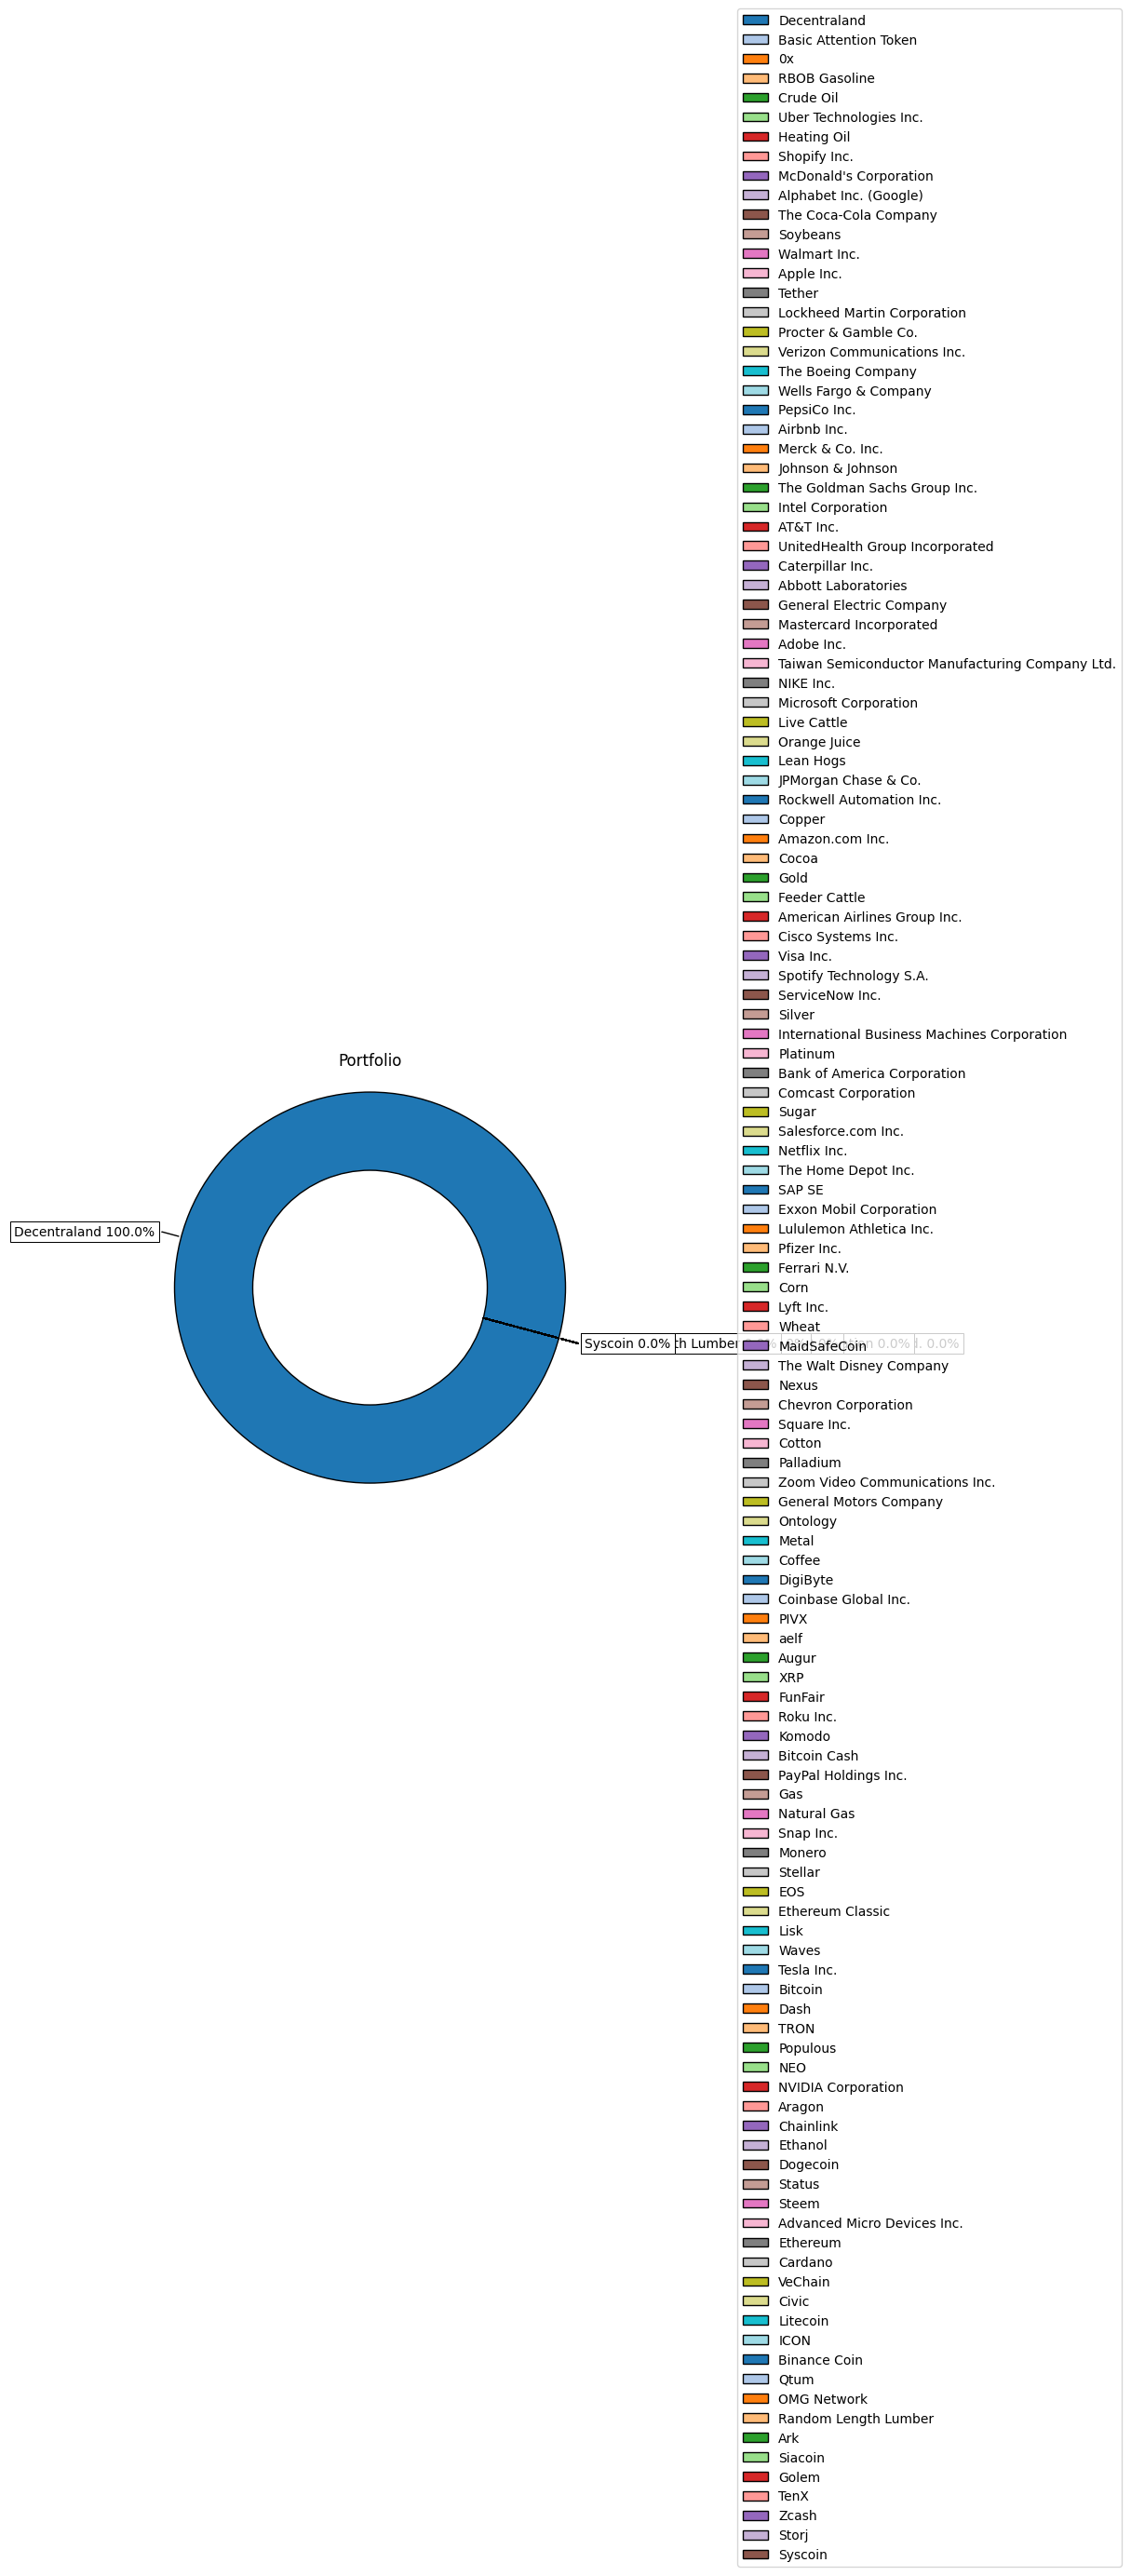

In [12]:
port = rp.Portfolio(returns=returns)
hc_port = rp.HCPortfolio(returns=returns)

port.assets_stats(method_mu='hist', method_cov='hist', d=0.94)


w1 = port.optimization(model='Classic', rm='MV', obj='MaxRet', rf=0, l=0, hist=True) # Sharpe, MinRisk, MaxRet

w2 = port.rp_optimization(model='Classic', rm='MV', rf=0, b=None, hist=True)

w3 = hc_port.optimization(
    model='NCO',
    codependence='pearson', 
    obj='Sharpe', 
    rm='MV', 
    rf=0, 
    linkage='single'
)

ws = port.efficient_frontier(model='Classic', rm='MV', points=30, rf=0, hist=True)


# w1: classic sharpe optimization
# w2: risk parity optimization (equal risk contribution)
# w3: Nested Clustered Optimization

w = w1

display(w.T*100)
ax = rp.plot_pie(w=w, title='Portfolio', others=0.01, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None)

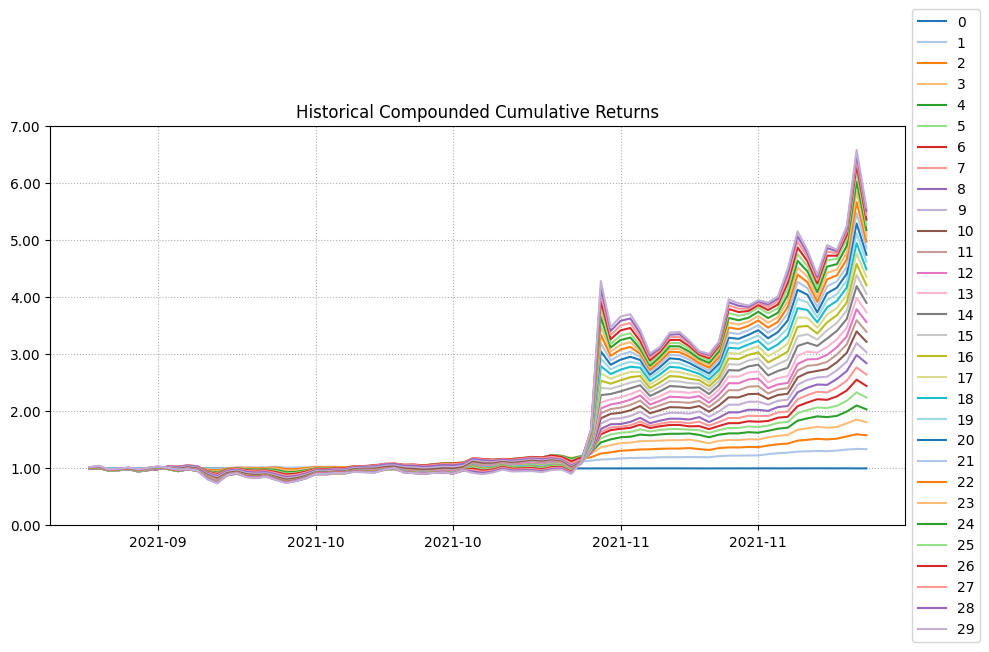

In [13]:
ax = rp.plot_series(returns=returns,
                    w=ws,
                    cmap='tab20',
                    height=6,
                    width=10,
                    ax=None)

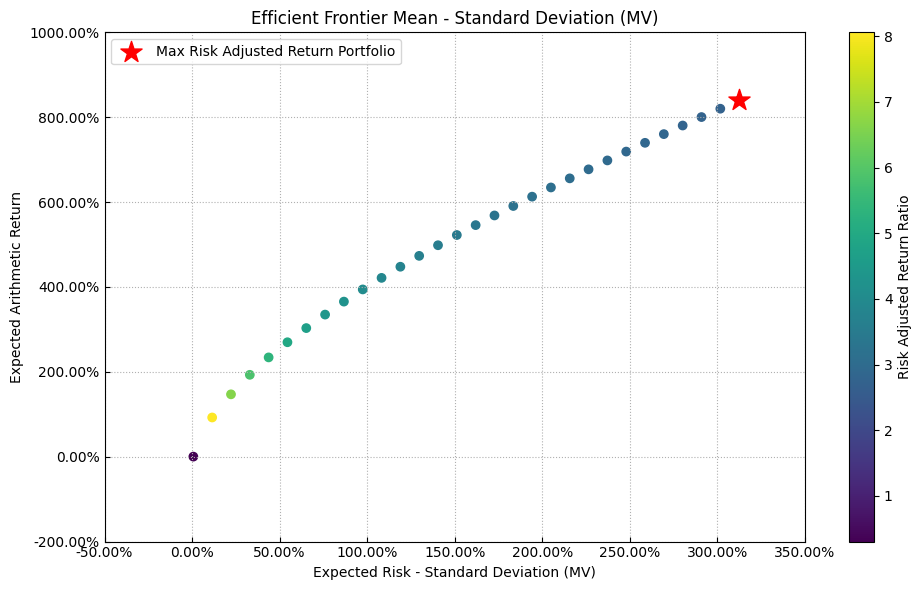

In [14]:
label = 'Max Risk Adjusted Return Portfolio'
mu = port.mu
cov = port.cov
returns = port.returns

ax = rp.plot_frontier(w_frontier=ws,
                      mu=mu,
                      cov=cov,
                      returns=returns,
                      rm="MV",
                      rf=0,
                      alpha=0.05,
                      cmap='viridis',
                      w=w,
                      label=label,
                      marker='*',
                      s=16,
                      c='r',
                      height=6,
                      width=10,
                      t_factor=252,
                      ax=None)

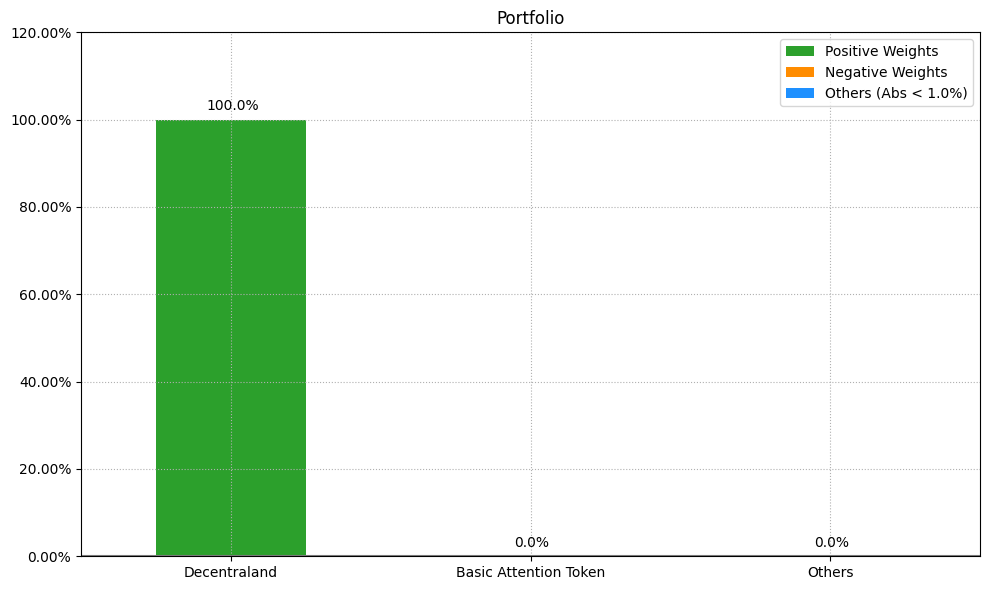

In [15]:
ax = rp.plot_bar(w,
                 title='Portfolio',
                 kind="v",
                 others=0.05,
                 nrow=25,
                 height=6,
                 width=10,
                 ax=None)

/home/puguix/.local/lib/python3.11/site-packages/riskfolio/src/PlotFunctions.py:1091: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  fig.tight_layout()


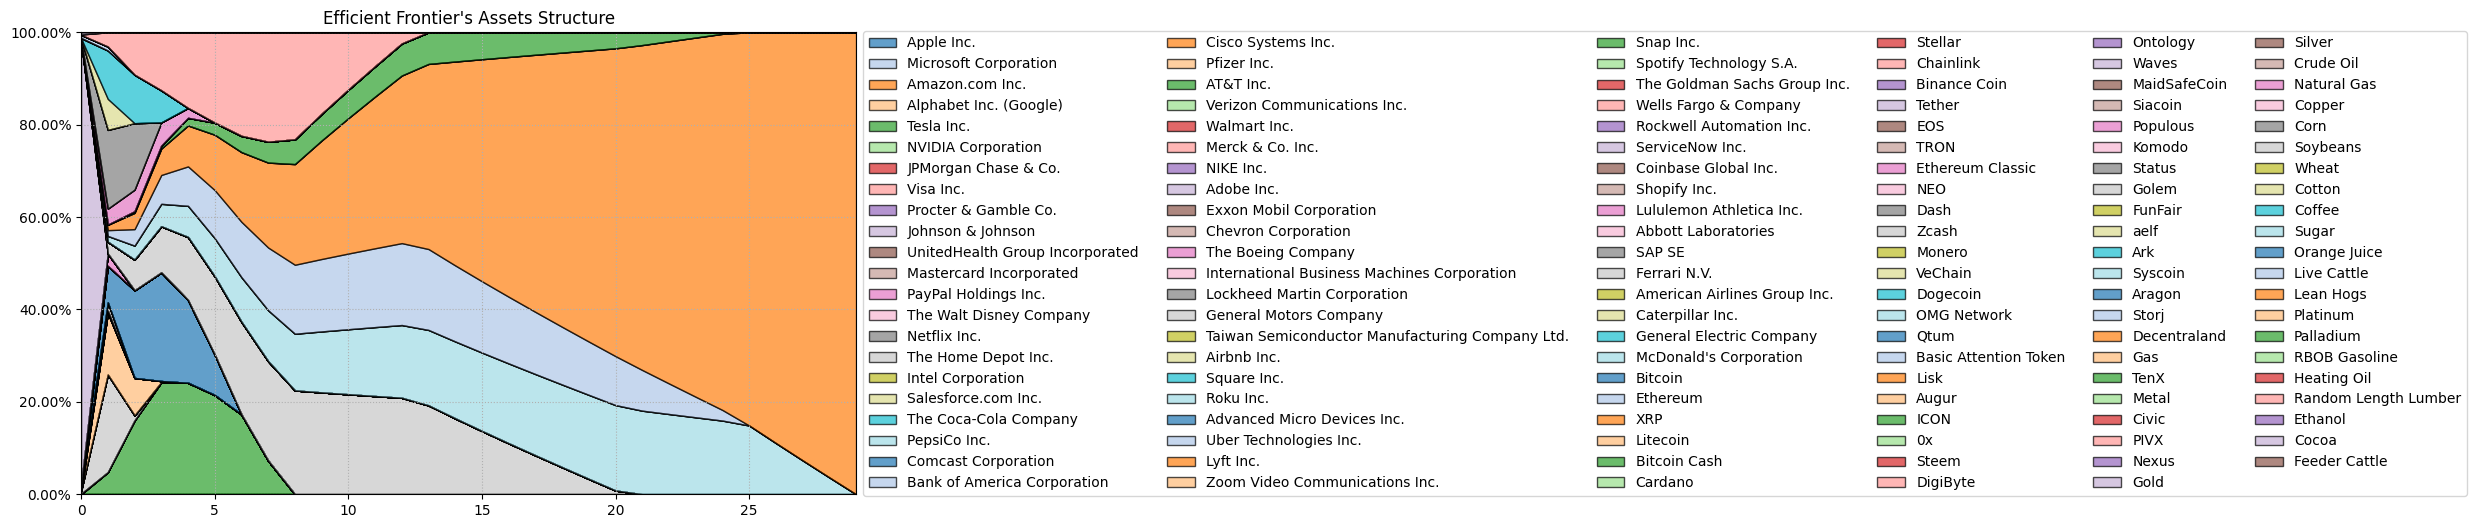

In [16]:
ax = rp.plot_frontier_area(w_frontier=ws,
                           cmap="tab20",
                           height=6,
                           width=10,
                           ax=None)

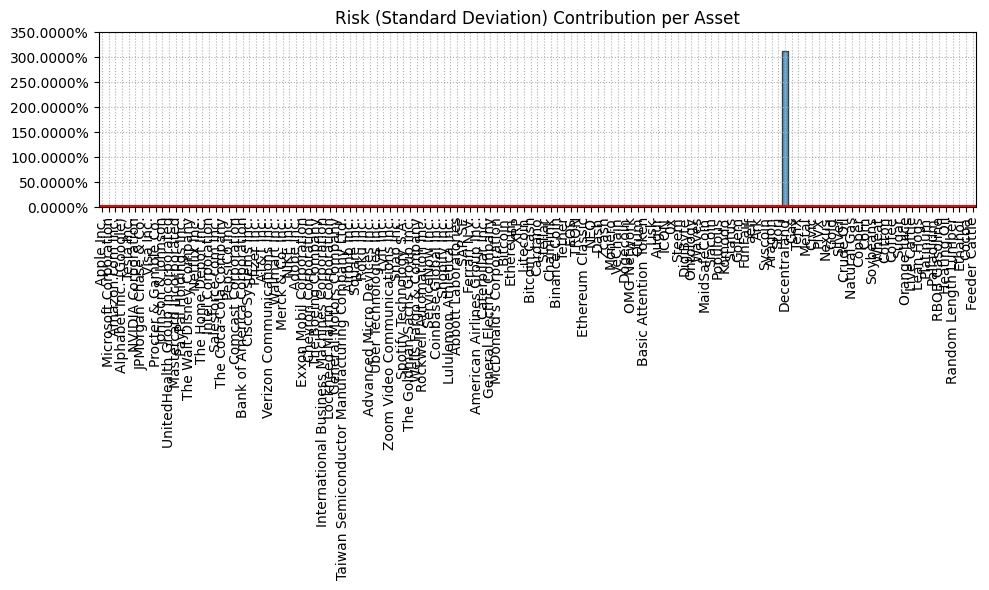

In [17]:
ax = rp.plot_risk_con(w=w,
                      cov=cov,
                      returns=returns,
                      rm="MV",
                      rf=0,
                      alpha=0.05,
                      color="tab:blue",
                      height=6,
                      width=10,
                      t_factor=252,
                      ax=None)

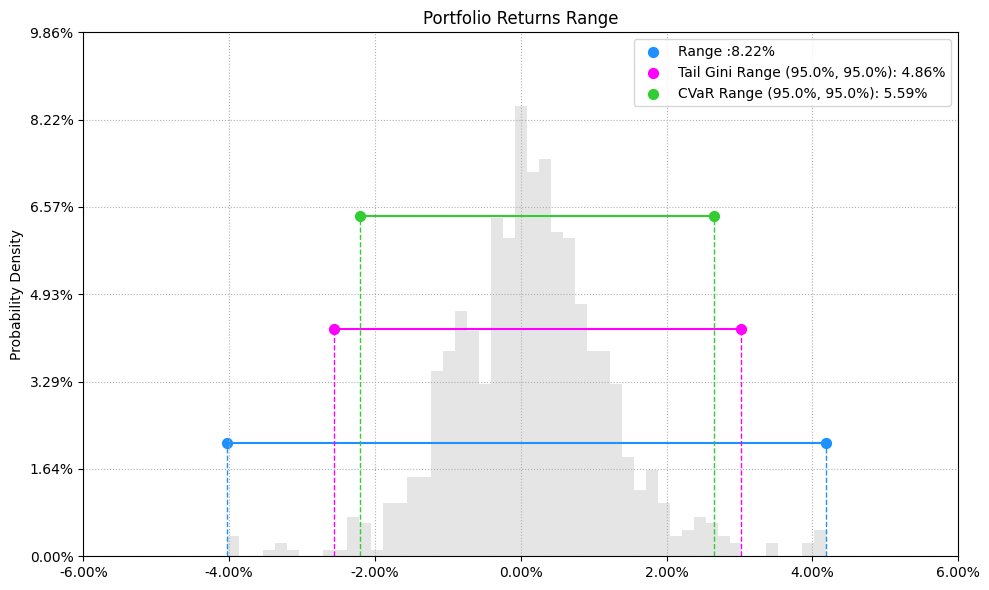

In [9]:
ax = rp.plot_range(returns=returns,
                w=w,
                alpha=0.05,
                a_sim=100,
                beta=None,
                b_sim=None,
                bins=50,
                height=6,
                width=10,
                ax=None)

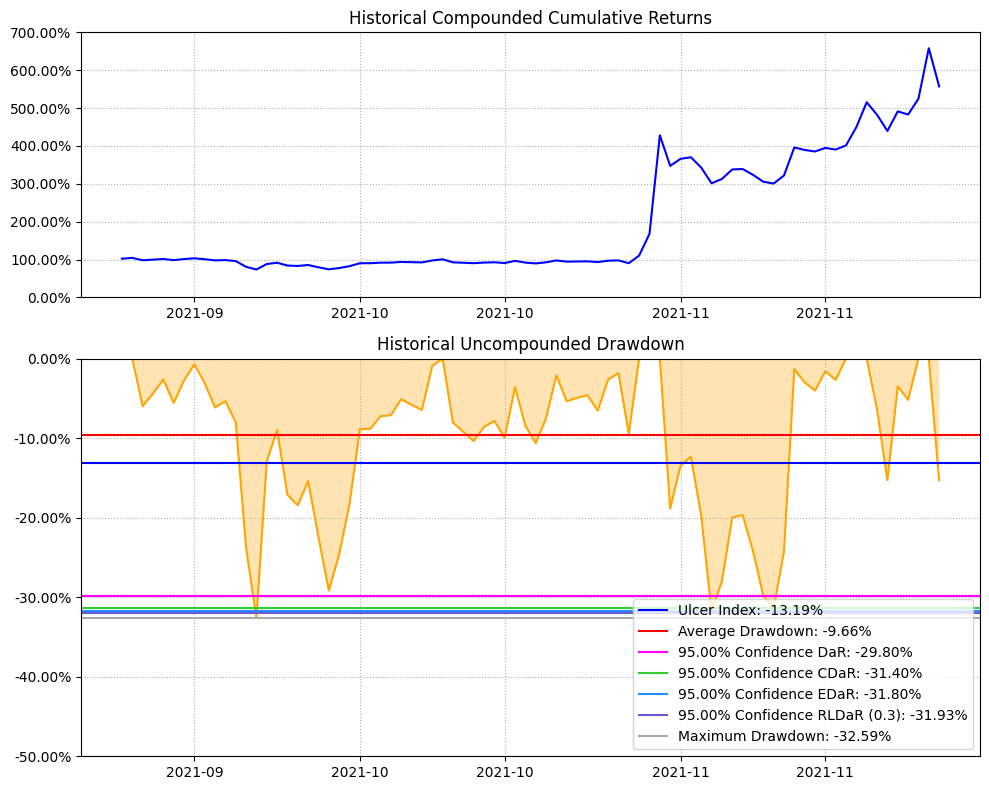

In [18]:
ax = rp.plot_drawdown(returns=returns,
                      w=w,
                      alpha=0.05,
                      height=8,
                      width=10,
                      ax=None)

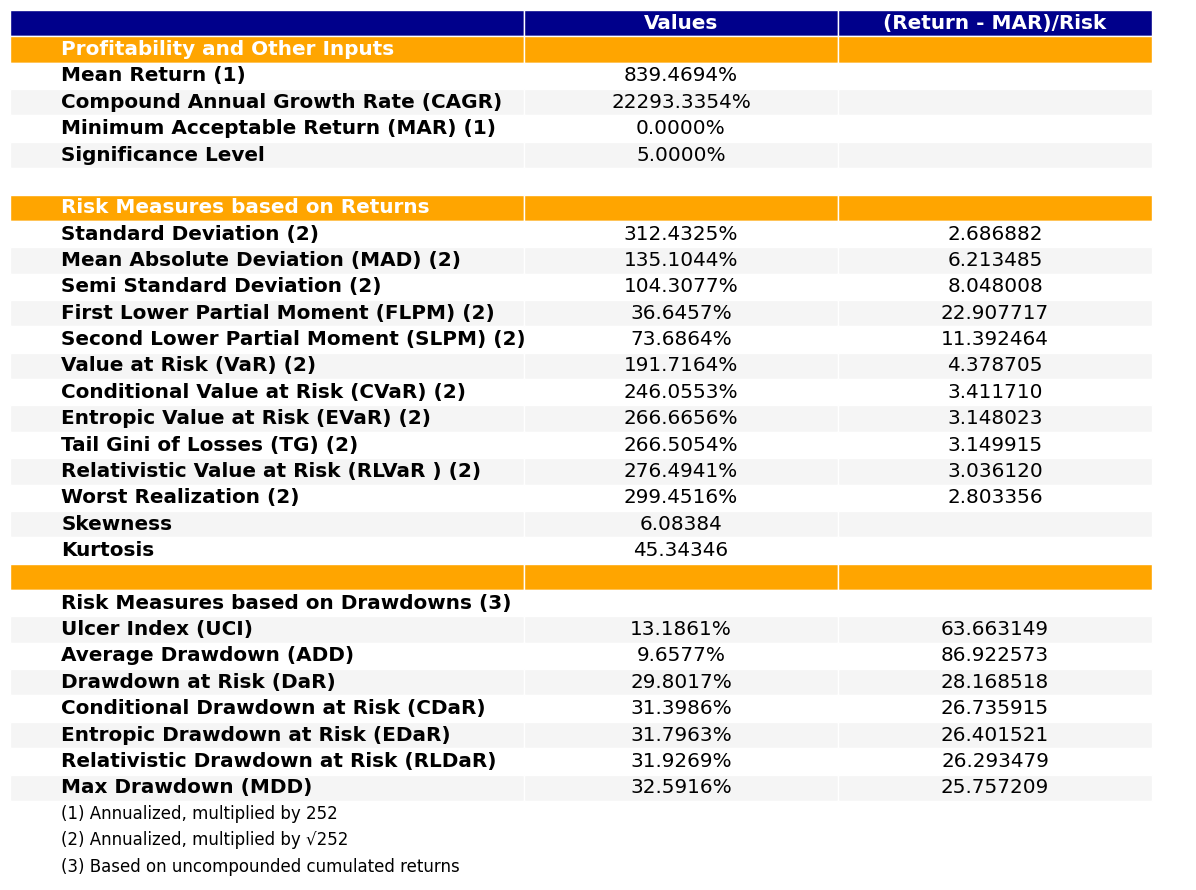

In [19]:
ax = rp.plot_table(returns=returns,
                   w=w,
                   MAR=0,
                   alpha=0.05,
                   ax=None)

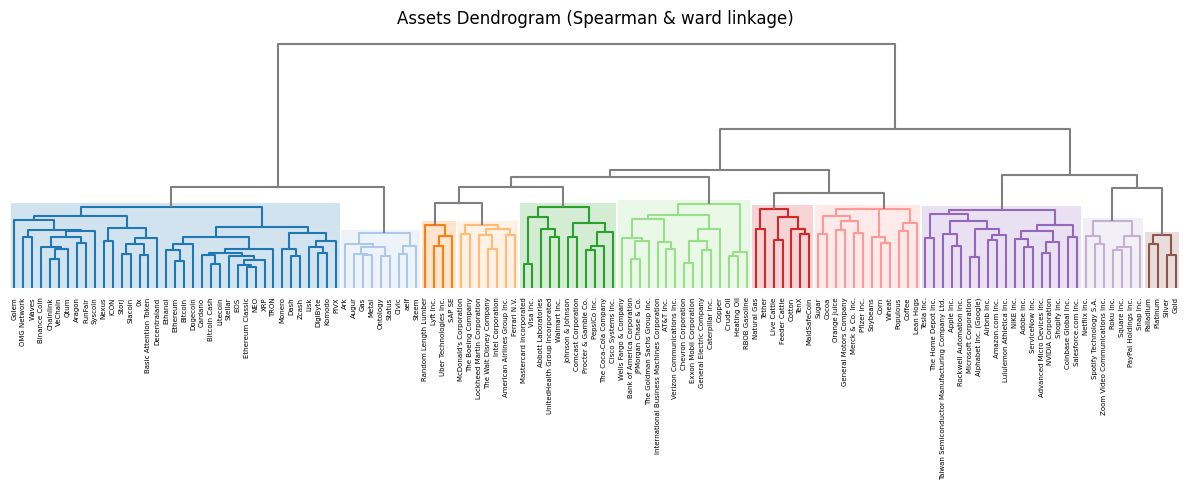

In [20]:
ax = rp.plot_dendrogram(returns=returns,
                        codependence='spearman',
                        linkage='ward',
                        k=None,
                        max_k=10,
                        leaf_order=True,
                        ax=None)

/home/puguix/.local/lib/python3.11/site-packages/riskfolio/src/PlotFunctions.py:2895: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


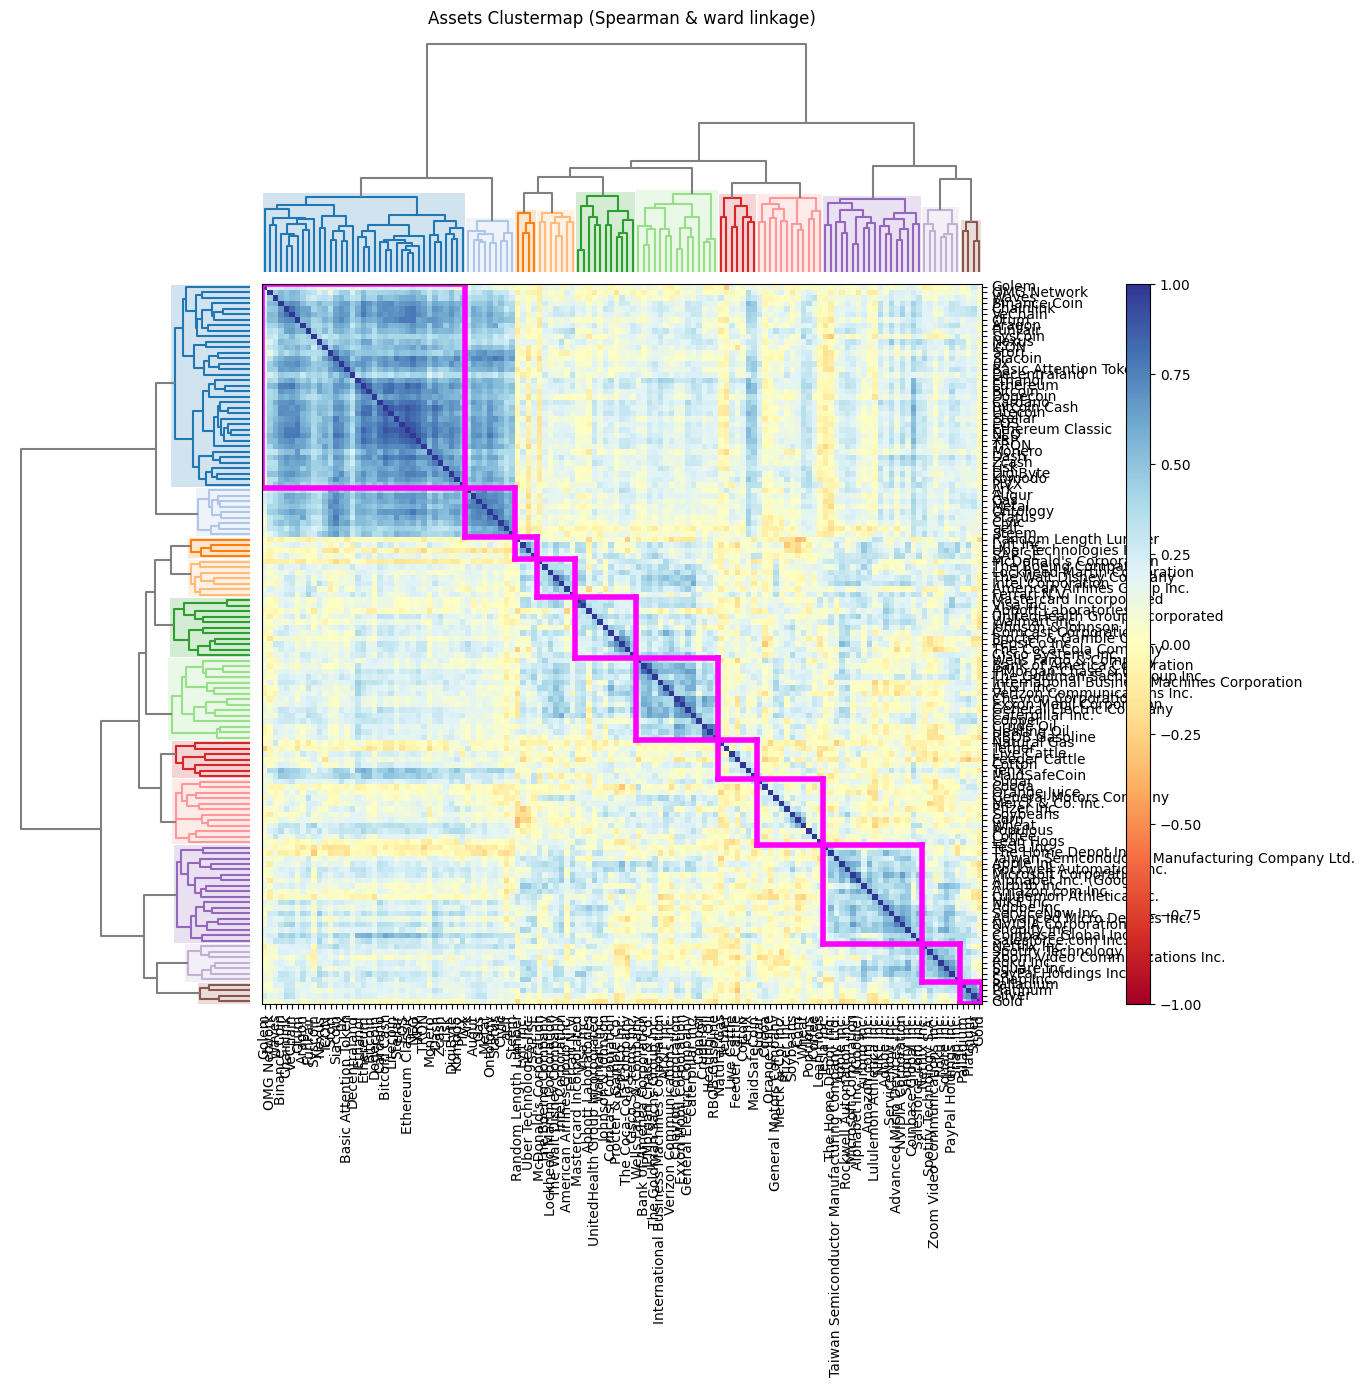

In [21]:
ax = rp.plot_clusters(returns=returns,
                      codependence='spearman',
                      linkage='ward',
                      k=None,
                      max_k=10,
                      leaf_order=True,
                      dendrogram=True,
                      ax=None)

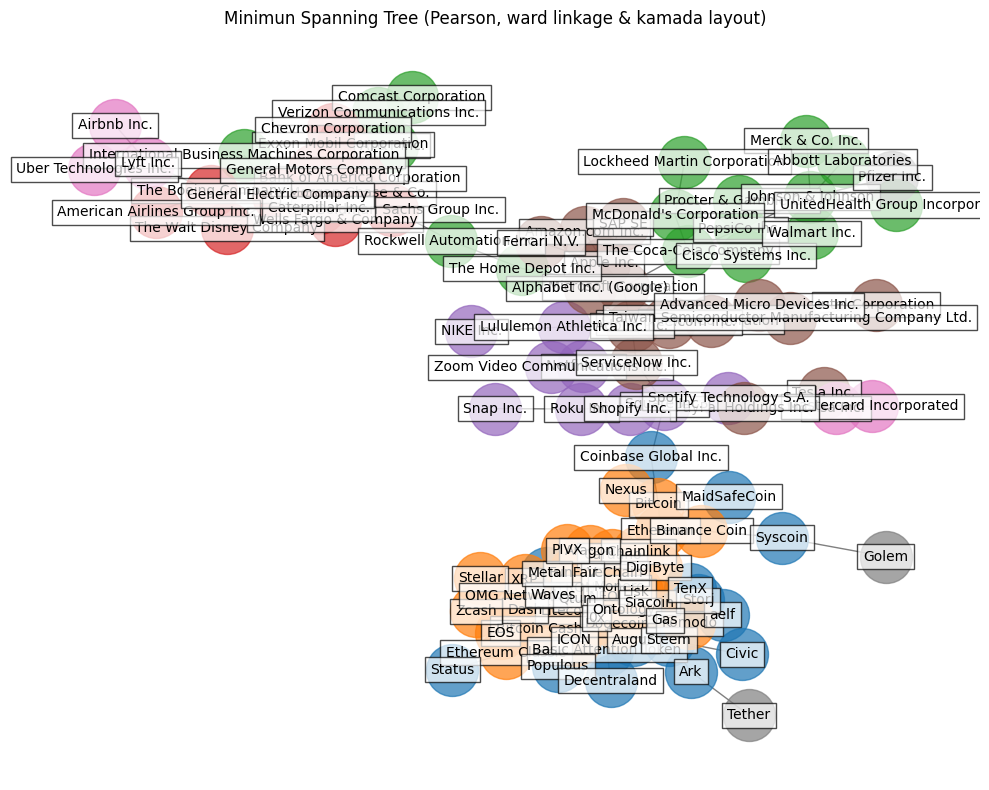

In [10]:
ax = rp.plot_network(returns=returns,
                     codependence="pearson",
                     linkage="ward",
                     k=None,
                     max_k=10,
                     alpha_tail=0.05,
                     leaf_order=True,
                     kind='kamada',
                     ax=None)

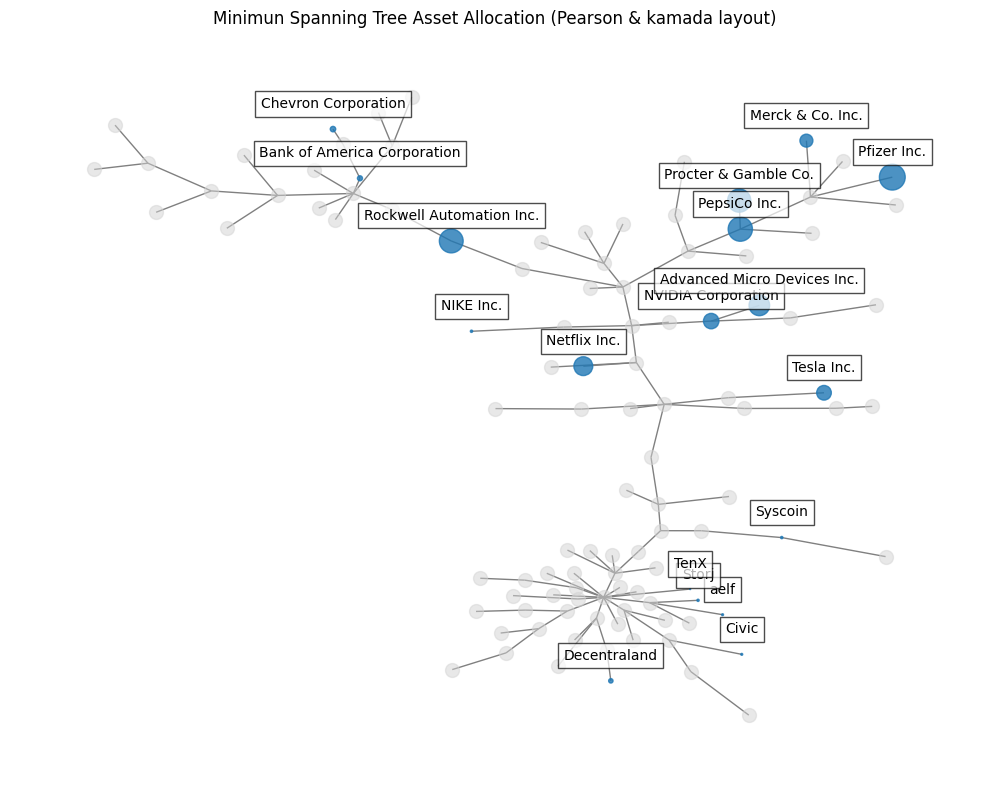

In [14]:
ax = rp.plot_network_allocation(returns=returns,
                                w=w,
                                codependence="pearson",
                                linkage="ward",
                                alpha_tail=0.05,
                                leaf_order=True,
                                kind='kamada',
                                ax=None)